In [17]:
# IMPORT PACKAGES
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
# import metpy.calc as mpcalc
import matplotlib.ticker as ticker
import xarray as xr
import os
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import matplotlib.cm as cm

# from mpl_toolkits.basemap import Basemap
%xmode Plain

Exception reporting mode: Plain


Read in data

In [18]:
# # Nlmax = 5
# DR_dir_l5 = \
# xr.open_dataset('/storage/silver/diamet/po918217/LoSSETT/out/DRdir_Nlmax5_1day.nc')
# # Nlmax = 10
# DR_dir_l10 = \
# xr.open_dataset('/storage/silver/diamet/po918217/LoSSETT/out/DRdir_Nlmax10_1day.nc')
# # Nlmax = 20
# DR_dir_l20 = \
# xr.open_dataset('/storage/silver/diamet/po918217/LoSSETT/out/DRdir_Nlmax20_1day.nc')
# # Nlmax=50
# DR_dir_l50 = \
# xr.open_dataset('/storage/silver/diamet/po918217/LoSSETT/out/DRdir_Nlmax50_1day.nc')
# Nlmax=76
DR_dir_l76 = \
xr.open_dataset('/storage/silver/diamet/po918217/LoSSETT/out/DRdir_Nlmax76_ORIG_1day.nc')

In [3]:
# DR_dir_l5_var = DR_dir_l5['DRdir']
# DR_dir_l10_var = DR_dir_l10['DRdir']
# DR_dir_l20_var = DR_dir_l20['DRdir']
# DR_dir_l50_var = DR_dir_l50['DRdir']
DR_dir_l76_var = DR_dir_l76['DRdir']
# DR_dir_map_3D = DR_dir_var[:,4,6,:,:]
# DR_dir_map_3D.shape
# DR_dir_l5_timemean = np.mean(DR_dir_map_3D,axis=0)
# DR_dir_l10_timemean = np.mean(DR_dir_map_3D,axis=0)
# DR_dir_l5_var
DR_dir_l76_var['level']

<xarray.DataArray 'level' (level: 12)>
array([ 100.,  150.,  200.,  250.,  300.,  400.,  500.,  600.,  700.,  850.,
        925., 1000.])
Coordinates:
  * level    (level) float64 100.0 150.0 200.0 250.0 ... 700.0 850.0 925.0 1e+03

In [111]:
DR_dir_l20_var[1:19:4,:,:].mean()

/home/users/de821981/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


<xarray.DataArray 'DRdir' ()>
array(nan)

Plotting

/home/users/de821981/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/users/de821981/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/users/de821981/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/users/de821981/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/users/de821981/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/users/de821981/.conda/en

/home/users/de821981/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


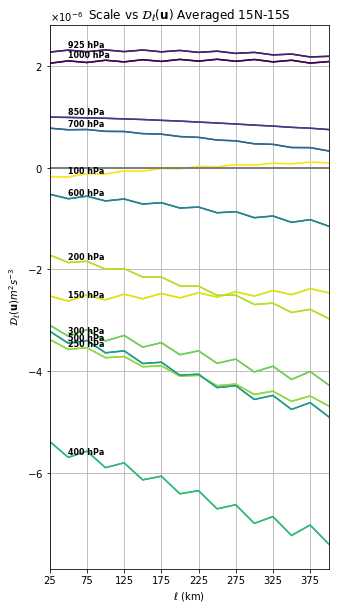

In [25]:
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(5,10))
DR_dir_l76_t1 = DR_dir_l76.sel(time=920441)

levels = [100,150,200,250,300,400,500,600,700,850,925,1000]

all_values = []

cmap = cm.get_cmap('viridis_r')  # You can choose any colormap from Matplotlib
norm = plt.Normalize(min(levels), max(levels))

for level in levels:
    lat_range = DR_dir_l76_t1.sel(latitude=slice(15, -15)).mean(dim='latitude')
    level_value = lat_range.sel(level=level)
    lon_avg = level_value.mean(dim='longitude')
    masked_lon_avg = lon_avg.where((lon_avg >= -1e4) & (lon_avg <= 1e4), drop=True)
    all_values.extend(masked_lon_avg['DRdir'].values)
    
min_value = np.min(all_values)
max_value = np.max(all_values)

for level in levels:
    lat_range = DR_dir_l76_t1.sel(latitude=slice(15, -15)).mean(dim='latitude')
    level_value = lat_range.sel(level=level)
    lon_avg = level_value.mean(dim='longitude')
    masked_lon_avg = lon_avg.where((lon_avg >= -1e4) & (lon_avg <= 1e4), drop=True)
    color=cmap(norm(level))
    label = '{} hPa'.format(level)
    # Plot with the normalized values
    plt.plot(masked_lon_avg['filtering_scale'], masked_lon_avg['DRdir'], color=color,label=label)

for idx, level in enumerate(levels):
    lat_range = DR_dir_l76_t1.sel(latitude=slice(15, -15)).mean(dim='latitude')
    level_value = lat_range.sel(level=level)
    lon_avg = level_value.mean(dim='longitude')
    masked_lon_avg = lon_avg.where((lon_avg >= -1e4) & (lon_avg <= 1e4), drop=True)
    color = cmap(norm(level))
    label = '{} hPa'.format(level)
    
    # Plot the line
    plt.plot(masked_lon_avg['filtering_scale'], masked_lon_avg['DRdir'], color=color)
    
    # Choose a position along the x-axis to label the line (midpoint)
    x_pos = masked_lon_avg['filtering_scale'].values[len(masked_lon_avg) // 2]
    y_pos = masked_lon_avg['DRdir'].values[len(masked_lon_avg) // 2]
    
    # Label the line
    plt.text(x_pos, y_pos+1e-7, label, fontsize=8, color='k', ha='left', va='center', fontweight='bold')

plt.axhline(0, color='grey', linewidth=2)

# Format y-axis labels to scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))


plt.gca().set_xticklabels([25,75,125,175,225,275,325,375])
plt.xlabel(r'$\ell$ (km)')
plt.ylabel(r'$\mathcal{D}_{\ell}(\mathbf{u}) m^2s^{-3}$')
plt.grid()
# plt.legend()
# plt.yscale('log')
plt.xlim(0,15)
# plt.ylim()
plt.title(r'Scale vs $\mathcal{D}_{\ell}(\mathbf{u})$ Averaged 15N-15S')
plt.savefig('/home/users/de821981/DuchonRobert/Plotting/l_v_DRDir.pdf',dpi=600)

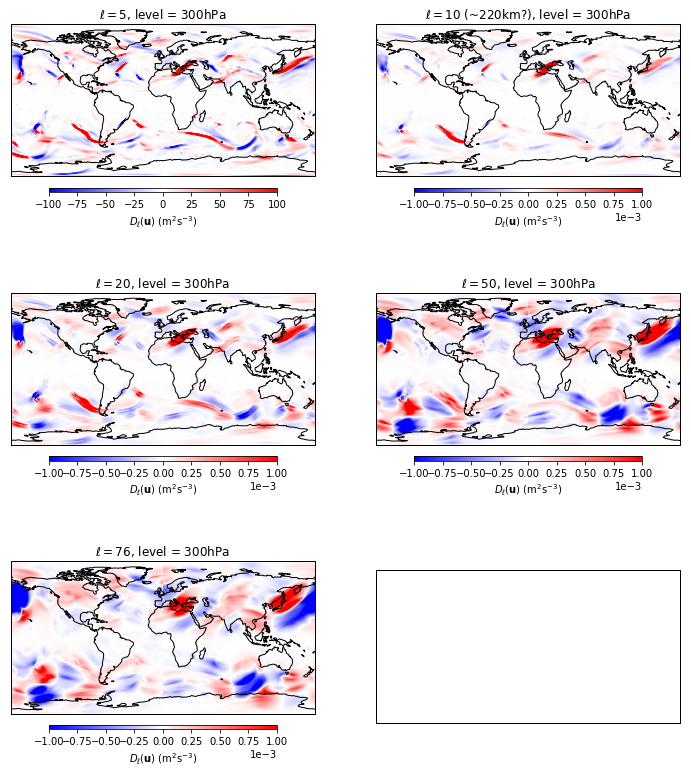

In [26]:
lon=DR_dir_l5['longitude']
lat=DR_dir_l5['latitude']

fig,axs = plt.subplots(3,2,figsize=(12,14),subplot_kw={'projection': ccrs.PlateCarree()})

titles = [r"$\ell=5$, level = 300hPa",r"$\ell=10$ (~220km?), level = 300hPa",\
          r"$\ell=20$, level = 300hPa",r"$\ell=50$, level = 300hPa",\
          r"$\ell=76$, level = 300hPa"]
data = [DR_dir_l5_var[1,4,4,:,:],DR_dir_l10_var[1,9,4,:,:],DR_dir_l20_var[1,19,4,:,:],\
        DR_dir_l50_var[1,49,4,:,:],DR_dir_l76_var[1,75,4,:,:]]

vmin=[-100,-1e-3,-1e-3,-1e-3,-1e-3]
vmax=[100, 1e-3, 1e-3, 1e-3,1e-3]

for ax,title,d,vmin_val,vmax_val in  zip(axs.flat,titles,data,vmin,vmax):
    
    ax.set_title(title)
    
    ax.coastlines()
    
    mesh = ax.pcolormesh(lon, lat, d, transform=ccrs.PlateCarree(), cmap='bwr',\
                         vmin=vmin_val, vmax=vmax_val)

    cbar = fig.colorbar(mesh, ax=ax, orientation='horizontal', shrink=0.75, pad=0.05,\
                        aspect=50)
    cbar.set_label(r'$D_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
    cbar.formatter = ticker.ScalarFormatter()
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((-3, 3))
    cbar.update_ticks()    
        

# fig.savefig('/home/users/de821981/DuchonRobert/Plotting/test_5panel_l5l10l20l50l76.pdf')

In [27]:
DR_dir_l5_slice = DR_dir_l5_var[1,4,:,:]
DR_dir_l10_slice = DR_dir_l10_var[1,9,:,:]
DR_dir_l20_slice = DR_dir_l20_var[1,19,:,:]
DR_dir_l50_slice = DR_dir_l50_var[1,49,:,:]
DR_dir_l76_slice = DR_dir_l76_var[1,75,:,:]


sliceDR_l5 = np.mean(DR_dir_l5_slice,axis=2)
sliceDR_l10 = np.mean(DR_dir_l10_slice,axis=2)
sliceDR_l20 = np.mean(DR_dir_l20_slice,axis=2)
sliceDR_l50 = np.mean(DR_dir_l50_slice,axis=2)
sliceDR_l76 = np.mean(DR_dir_l76_slice,axis=2)

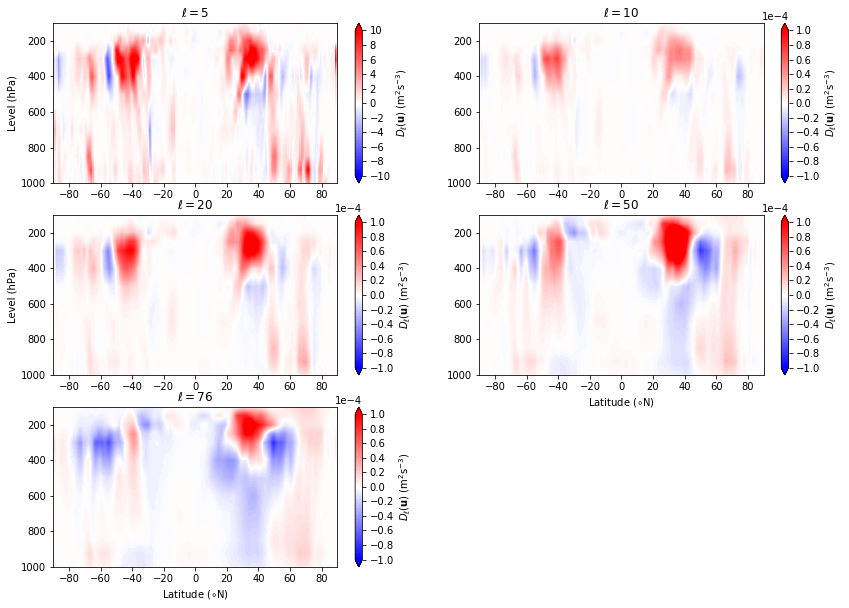

In [33]:
fig,ax = plt.subplots(3,2,figsize=(14,10))
lev = sliceDR_l5['level']
lat=sliceDR_l5['latitude']

plt.subplot(321)
CS = plt.contourf(lat,lev,sliceDR_l5,levels=np.linspace(-10,10,101),cmap='bwr',extend='both')
plt.gca().invert_yaxis()
cbar = plt.colorbar(CS)
cbar.set_ticks(np.arange(-10,12,2))
cbar.set_label(r'$D_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
plt.ylabel('Level (hPa)')
# plt.xlabel('Latitude ($\circ$N)')
plt.title(r'$\ell=5$')

plt.subplot(322)
CS = plt.contourf(lat,lev,sliceDR_l10,levels=np.linspace(-1e-4,1e-4,101),cmap='bwr',extend='both')
plt.gca().invert_yaxis()
cbar = plt.colorbar(CS)
cbar.set_ticks(np.arange(-1e-4,1.2e-4,2e-5))
cbar.formatter = ticker.ScalarFormatter()
cbar.formatter.set_scientific(True)
cbar.formatter.set_powerlimits((-3, 3))
cbar.update_ticks()
cbar.set_label(r'$D_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
# plt.ylabel('Level (hPa)')
# plt.xlabel('Latitude ($\circ$N)')
plt.title(r'$\ell=10$')

plt.subplot(323)
CS = plt.contourf(lat,lev,sliceDR_l20,levels=np.linspace(-1e-4,1e-4,101),cmap='bwr',extend='both')
plt.gca().invert_yaxis()
cbar = plt.colorbar(CS)
cbar.set_ticks(np.arange(-1e-4,1.2e-4,2e-5))
cbar.formatter = ticker.ScalarFormatter()
cbar.formatter.set_scientific(True)
cbar.formatter.set_powerlimits((-3, 3))
cbar.update_ticks()
cbar.set_label(r'$D_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
plt.ylabel('Level (hPa)')
# plt.xlabel('Latitude ($\circ$N)')
plt.title(r'$\ell=20$')

plt.subplot(324)
CS = plt.contourf(lat,lev,sliceDR_l50,levels=np.linspace(-1e-4,1e-4,101),cmap='bwr',extend='both')
plt.gca().invert_yaxis()
cbar = plt.colorbar(CS)
cbar.set_ticks(np.arange(-1e-4,1.2e-4,2e-5))
cbar.formatter = ticker.ScalarFormatter()
cbar.formatter.set_scientific(True)
cbar.formatter.set_powerlimits((-3, 3))
cbar.update_ticks()
cbar.set_label(r'$D_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
# plt.ylabel('Level (hPa)')
plt.xlabel('Latitude ($\circ$N)')
plt.title(r'$\ell=50$')

plt.subplot(325)
CS = plt.contourf(lat,lev,sliceDR_l76,levels=np.linspace(-1e-4,1e-4,101),cmap='bwr',extend='both')
plt.gca().invert_yaxis()
cbar = plt.colorbar(CS)
cbar.set_ticks(np.arange(-1e-4,1.2e-4,2e-5))
cbar.formatter = ticker.ScalarFormatter()
cbar.formatter.set_scientific(True)
cbar.formatter.set_powerlimits((-3, 3))
cbar.update_ticks()
cbar.set_label(r'$D_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
# plt.ylabel('Level (hPa)')
plt.xlabel('Latitude ($\circ$N)')
plt.title(r'$\ell=76$')

plt.subplot(326)
plt.axis('off')

fig.savefig('/home/users/de821981/DuchonRobert/Plotting/slice_4panel_l5l10l20l50l76.png',dpi=300)

In [15]:
DR_dir_slice=DR_dir_var[1,9,:,:,:]
sliceDR = np.mean(DR_dir_slice,axis=2)

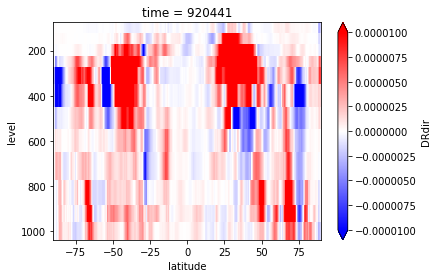

In [21]:
sliceDR.plot(vmin=-1e-5,vmax=1e-5,cmap='bwr',shading='interp')
plt.gca().invert_yaxis()

([<matplotlib.axis.YTick at 0x2b692fbcd6a0>,
 <a list of 12 Text yticklabel objects>)

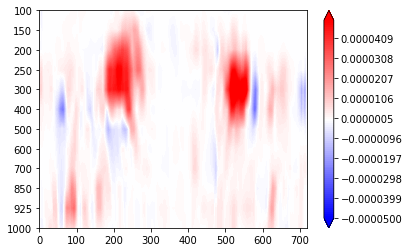

In [24]:
CS = plt.contourf(sliceDR,levels=np.linspace(-5e-5,5e-5,100),cmap='bwr',extend='both')
plt.gca().invert_yaxis()
cbar = plt.colorbar(CS)
# cbar.set_ticks([-5e-5,0,5e-5])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11],['100','150','200','250','300','400','500','600','700','850','925','1000'])
# plt.yticks(DR_dir['level'])